In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



In [ ]:
filename="/content/sample_data/Advertising Budget and Sales.csv"
df=pd.read_csv("/content/sample_data/Advertising Budget and Sales.csv")
print(df)

     Unnamed: 0  TV Ad Budget ($)  Radio Ad Budget ($)  \
0             1             230.1                 37.8   
1             2              44.5                 39.3   
2             3              17.2                 45.9   
3             4             151.5                 41.3   
4             5             180.8                 10.8   
..          ...               ...                  ...   
195         196              38.2                  3.7   
196         197              94.2                  4.9   
197         198             177.0                  9.3   
198         199             283.6                 42.0   
199         200             232.1                  8.6   

     Newspaper Ad Budget ($)  Sales ($)  
0                       69.2       22.1  
1                       45.1       10.4  
2                       69.3        9.3  
3                       58.5       18.5  
4                       58.4       12.9  
..                       ...        ...  
195      

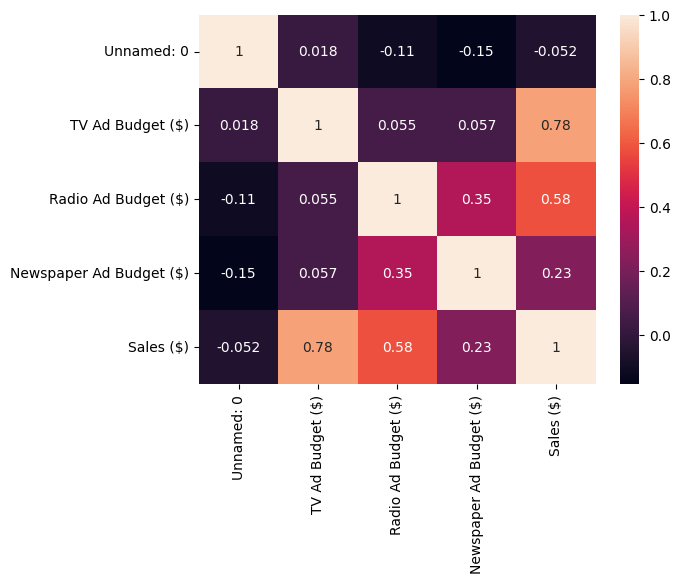

In [ ]:
sns.heatmap(df.corr(),annot=df.corr())
plt.show()

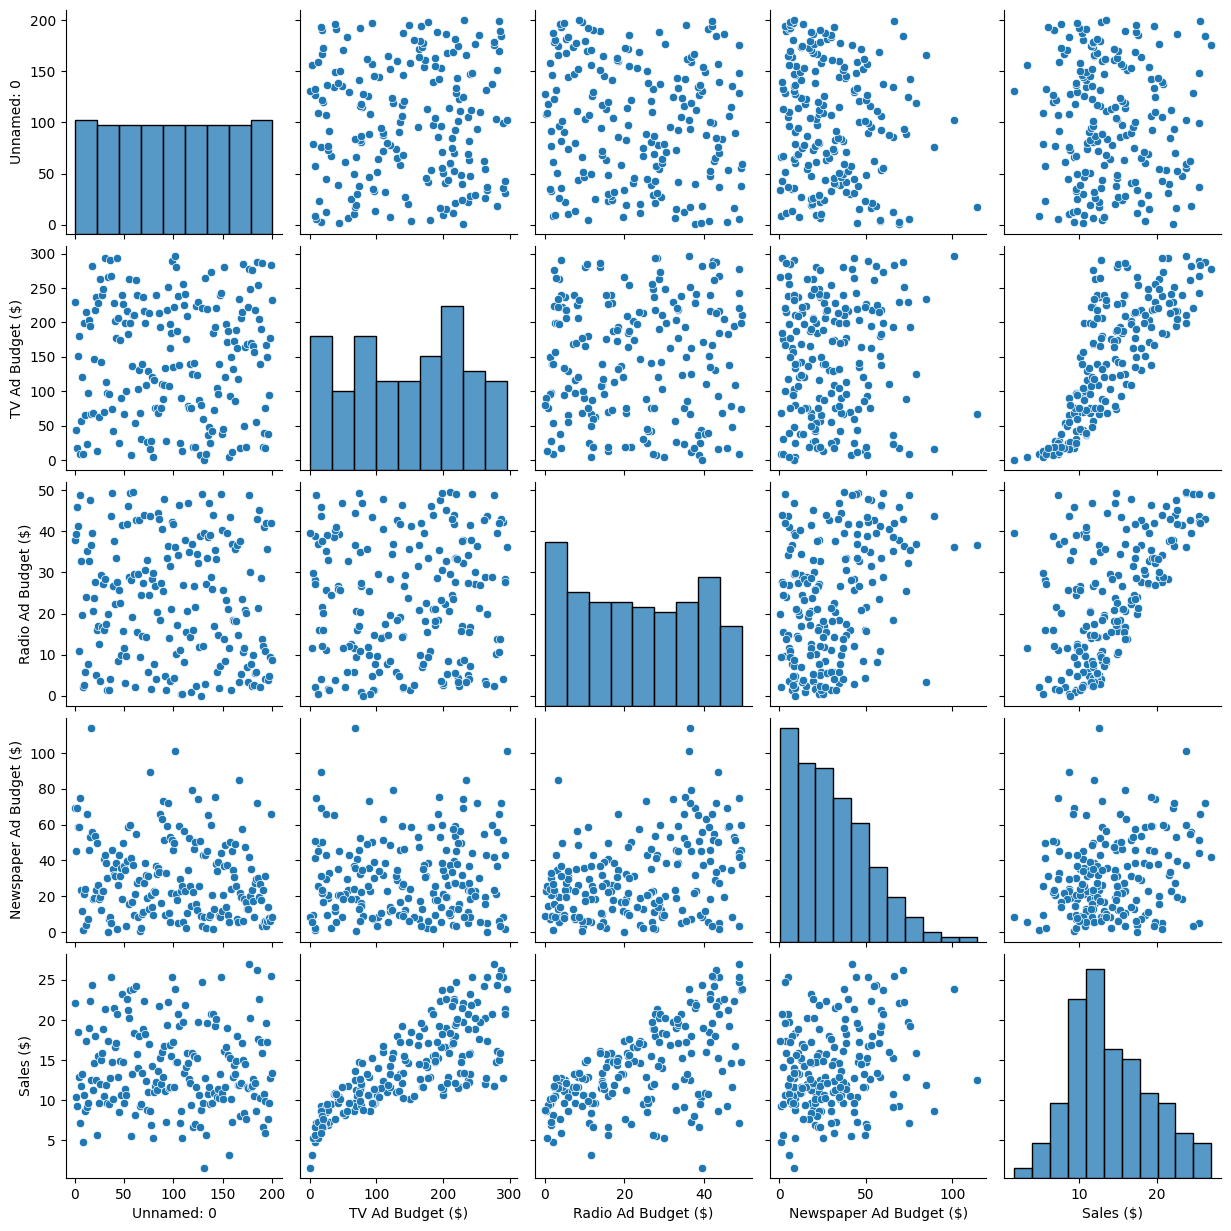

In [ ]:
sns.pairplot(df)

In [ ]:
print(df.columns)

Index(['Unnamed: 0', 'TV Ad Budget ($)', 'Radio Ad Budget ($)',
       'Newspaper Ad Budget ($)', 'Sales ($)'],
      dtype='object')


In [ ]:
x=np.array(df["TV Ad Budget ($)"]).reshape(-1,1)
y=np.array(df["Sales ($)"]).reshape(-1,1)
print(x)
print(y)

[[230.1]
 [ 44.5]
 [ 17.2]
 [151.5]
 [180.8]
 [  8.7]
 [ 57.5]
 [120.2]
 [  8.6]
 [199.8]
 [ 66.1]
 [214.7]
 [ 23.8]
 [ 97.5]
 [204.1]
 [195.4]
 [ 67.8]
 [281.4]
 [ 69.2]
 [147.3]
 [218.4]
 [237.4]
 [ 13.2]
 [228.3]
 [ 62.3]
 [262.9]
 [142.9]
 [240.1]
 [248.8]
 [ 70.6]
 [292.9]
 [112.9]
 [ 97.2]
 [265.6]
 [ 95.7]
 [290.7]
 [266.9]
 [ 74.7]
 [ 43.1]
 [228. ]
 [202.5]
 [177. ]
 [293.6]
 [206.9]
 [ 25.1]
 [175.1]
 [ 89.7]
 [239.9]
 [227.2]
 [ 66.9]
 [199.8]
 [100.4]
 [216.4]
 [182.6]
 [262.7]
 [198.9]
 [  7.3]
 [136.2]
 [210.8]
 [210.7]
 [ 53.5]
 [261.3]
 [239.3]
 [102.7]
 [131.1]
 [ 69. ]
 [ 31.5]
 [139.3]
 [237.4]
 [216.8]
 [199.1]
 [109.8]
 [ 26.8]
 [129.4]
 [213.4]
 [ 16.9]
 [ 27.5]
 [120.5]
 [  5.4]
 [116. ]
 [ 76.4]
 [239.8]
 [ 75.3]
 [ 68.4]
 [213.5]
 [193.2]
 [ 76.3]
 [110.7]
 [ 88.3]
 [109.8]
 [134.3]
 [ 28.6]
 [217.7]
 [250.9]
 [107.4]
 [163.3]
 [197.6]
 [184.9]
 [289.7]
 [135.2]
 [222.4]
 [296.4]
 [280.2]
 [187.9]
 [238.2]
 [137.9]
 [ 25. ]
 [ 90.4]
 [ 13.1]
 [255.4]
 [225.8]
 

In [ ]:
#train and test model
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75)
print(df.shape) #shape of teh data

(200, 5)


In [ ]:
model=LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
#train data is 75%
x_train.shape

(150, 1)

In [ ]:
#training score
model.score(x_train,y_train)

0.6025321716447374

In [ ]:
#testing score
model.score(x_test,y_test)

0.6267629292851887

In [ ]:
#model accuracy score

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6267629292851887

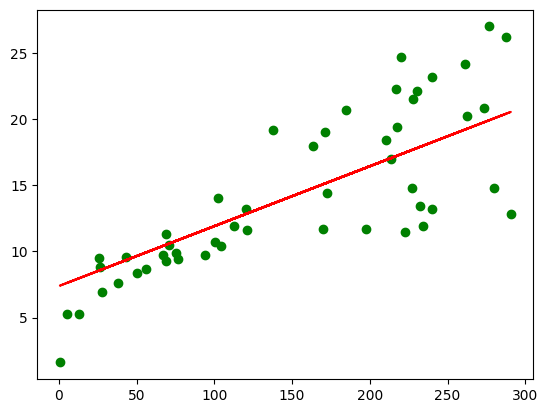

In [ ]:
plt.scatter(x=x_test,y=y_test,color="g")
plt.plot(x_test,y_pred,color="r")

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif=pd.DataFrame()
vif['Features']=df.columns
vif['VIF']=[variance_inflation_factor(df.values,i)for i in range(df.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
print(vif)

                  Features    VIF
4                Sales ($)  61.93
1         TV Ad Budget ($)  23.75
2      Radio Ad Budget ($)  12.96
3  Newspaper Ad Budget ($)   3.16
0               Unnamed: 0   2.92


In [ ]:
df_train,df_test=train_test_split(df,train_size=0.75)
print(df.shape)
print(df_train.shape)
print(df_test.shape)

(200, 5)
(150, 5)
(50, 5)


In [ ]:
model=LinearRegression()
y_train=df_train.pop("Sales ($)")
x_train=df_train
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_test=df_test.pop("Sales ($)")
x_test=df_test
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))
ypred=model.predict(x_test)

#print(x_test.shape)
#print(y_test.shape)


#print(x_train.shape)
#print(y_train.shape)



0.9191506644235163
0.8006293935130051
